# Fetch G-ring Data

This notebook gets G event data and stores it to a local MSEED file or an SDS filesystem

In [ ]:
from sixdegrees import sixdegrees

## Configurations

Here we set the configuration parameters

In [11]:
config = {
    # Required time window parameters
    'tbeg': "2024-12-05 18:34:21",  # Start time
    'tend': "2024-12-05 21:34:21",  # End time

    # event
    'origin_time': "2024-12-05 18:44:26",
    'magnitude': 7.0,

    # SEED identifiers
    'seed': "XX.RLAS..",     # seed ID of output stream
    'rot_seed': ["BW.RLAS..BJZ"], # Rotation sensor seed ID
    'tra_seed': ["GR.WET..BHZ", "GR.WET..BHN", "GR.WET..BHE"],  # Translation sensor seed ID

    # Data source
    'data_source': "fdsn",  # "fdsn" | "sds" | "mseed_file"

    # FDSN client
    'fdsn_client_rot': "LMU",  # "IRIS",
    'fdsn_client_tra': "BGR",  # "IRIS",

    # Remove response
    'tra_remove_response': True,
    'rot_remove_response': True,

    # Path configurations
    'workdir': "./",            # Working directory
    'path_to_data_out': "./output/",  # Output directory

    # Project information
    'project': "G_Analysis",  # Project name
    
    # Optional parameters
    'verbose': True,            # Print detailed information
}

Setup a sixdegrees object

In [12]:
sd = sixdegrees(conf=config)

INFO: no path to translation station inventory given!
INFO: no path to rotation station inventory given!


In [13]:
sd.load_data(config['tbeg'], config['tend'])

-> fetching GR.WET..BHZ data from FDSN
-> fetching GR.WET..BHN data from FDSN
-> fetching GR.WET..BHE data from FDSN
-> translation inventory requested: Inventory created at 2025-08-26T01:46:27.905651Z
	Sending institution: SeisComP (BGR)
	Contains:
		Networks (1):
			GR
		Stations (1):
			GR.WET (GRSN Station Wettzell)
		Channels (9):
			GR.WET..BHZ, GR.WET..BHN, GR.WET..BHE, GR.WET..HHZ, GR.WET..HHN, 
			GR.WET..HHE, GR.WET..LHZ, GR.WET..LHN, GR.WET..LHE
-> removing response: ACC
3 Trace(s) in Stream:
GR.WET..BHZ | 2024-12-05T18:34:20.019999Z - 2024-12-05T21:34:22.019999Z | 20.0 Hz, 216041 samples
GR.WET..BHN | 2024-12-05T18:34:20.019999Z - 2024-12-05T21:34:22.019999Z | 20.0 Hz, 216041 samples
GR.WET..BHE | 2024-12-05T18:34:20.020000Z - 2024-12-05T21:34:22.020000Z | 20.0 Hz, 216041 samples
-> fetching BW.RLAS..BJZ data from FDSN
-> removing sensitivity
1 Trace(s) in Stream:
BW.RLAS..BJZ | 2024-12-05T18:34:19.981750Z - 2024-12-05T21:34:21.981750Z | 20.0 Hz, 216041 samples


Store the configuration as a pickle file

In [14]:
sd.trim_stream(set_common=True, set_interpolate=False)

### Store Configurations

In [ ]:
sd.store_as_yaml(sd.st, f"./config/config_G_eventM{config['magnitude']}.yml")

### Write data to file or SDS system

In [16]:
# write to mseed file
sd.st.write(f"./data/G_eventM{config['magnitude']}.mseed", format="MSEED")

# write to sds filesystem
# sd.write_to_sds(sd.st, "./data/", format="MSEED")

/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


### Load and Plot Data for Validation

Get key information about the event

In [17]:
if config['origin_time'] is not None:
    ev = sd.get_event_info(
        origin_time=config['origin_time'],
        base_catalog="USGS",
        magnitude=config['magnitude']
    )

Found event:
Origin time: 2024-12-05T18:44:21.110000Z
Magnitude: 7.0 mw
Location: 40.374°N, -125.022°E
Depth: 10.0 km
Epicentral Distance: 9264.5 km
Epicentral Distance: 83.3°
Backazimuth: 329.1°


Ensure that all traces of stream have the same sample size

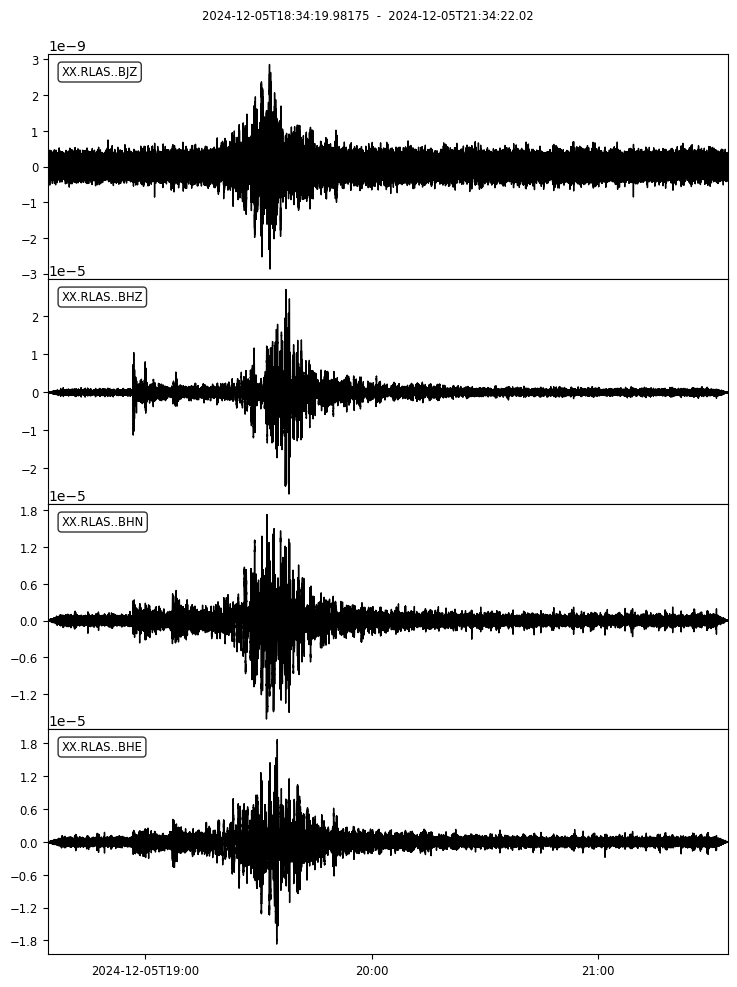

In [18]:
sd.st.plot(equal_scale=False);